# Physics HALO Challenge

Physics HALO, 2021

Time to put your Python knowledge to the test! This notebook contains a series of challenge questions which can be solved using concepts from this weekend's lectures. Feel free to look back at the slides/notebooks for the lectures, talk amongst your team, and even **use the internet!** A key part of programming is learning how to look things up online, even when you become a professional, so don't be afraid to google anything here!

The challenges start simple, and slowly increase in difficulty. Solve each problem in the spaces provided below the question. Some of the last ones will require creativity. Don't worry if you can't solve them all; it's intentionally designed that way so that you will have plenty to work on in these couple hours.

If you need any clarification on a problem or are thoroughly stuck, please reach out to one of the event coordinators. Good luck, and have fun!

## 0. Use this space to import any packages you need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
%matplotlib inline

## 1. Data Types and Variables

### a. Create a variable named `my_variable` which equals 205 squared

Hint: There is a built-in function to raise a number to an exponent

In [2]:
my_variable = 205 ** 2

### b. Define a list containing exactly four elements and three data types

Hint: `3.5` is of the "float" data type. What are two other data types?

In [3]:
my_list = [4, 2, 3.5, "hello"]

### c. Append any kind of element to the list you defined above

In [4]:
my_list.append(7)
my_list

[4, 2, 3.5, 'hello', 7]

## 2. Functions

### a. What is the mean of the `ages` list? Store it as an appropriately named variable

Hint: Use the `numpy` package here

In [5]:
ages = [12, 15, 18, 16, 17]

# Your work goes below here
age_mean = np.mean(ages)
age_mean

15.6

### b. What is the median of the `ages` list? Store it as an appropriately named variable

In [6]:
age_median = np.median(ages)
age_median

16.0

### c. Test whether the mean of `ages` is greater than the median using a logical test and your variables from above

In [7]:
age_mean > age_median

False

## 3. Custom functions

### a. Complete this function which calculates the area of a circle given is radius r

Hint: Mathematical constants like pi are given in the `numpy` package

In [8]:
def circle_area(r):
    # Your code below here
    return np.pi * r ** 2

circle_area(1)

3.141592653589793

### b. (for bonus!) Create a function which calculates the nth Fibonacci number

Hint: Fibonacci numbers are created by summing the previous two Fibonacci numbers. The 1st Fibonacci number is `1`, the 2nd is `1`, the 3rd is `1+1=2`, the 4th is `1+2=3`, etc. So the whole series goes `1, 1, 2, 3, 5, 8, 13, 21, ...`.

In [9]:
def fibonacci(n):
    if n == 1 or n == 2:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

fib = [fibonacci(n) for n in range(1, 11)]
fib

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

## 4. Reading Data and Plotting

### a. Read in `plot_data.csv` as a DataFrame and save it to a variable

Hint: DataFrames are part of the `pandas` package

In [10]:
data = pd.read_csv('plot_data.csv')
data.head()

,x,y1,y2
0,0.000000,15.895754,25.043610
1,0.204082,12.276973,16.840727
2,0.408163,14.912791,25.702279
3,0.612245,8.155552,18.551697
4,0.816327,10.308021,17.353293


### b. Create a scatter plot of the data using both `y1` and `y2`

Hint: You will essentially be creating two plots on top of each other, one which uses `x` and `y1`, and one which uses `x` and `y2`.

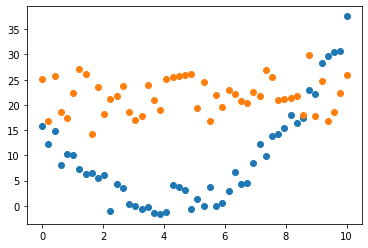

In [11]:
plt.figure()
plt.scatter(data['x'], data['y1'])
plt.scatter(data['x'], data['y2'])
plt.show()

### c. Complete this function which should represent the quadratic equation `y = ax^2 + bx + c`

Hint: What operators will you need to use to make this equaiton a valid Python expression?

In [12]:
def quadratic(x, a, b, c):
    # Your code below here
    return a * x ** 2 + b * x + c

quadratic(1, a = 1, b = 2, c = 3)

6

### d. Fit this function to each of `y1` and `y2` using an initial guess of (a = 1, b = 0, c = 0)

Hint: You will need the `scipy` package here

In [13]:
fit_1, cov_1 = curve_fit(quadratic, data['x'], data['y1'], p0 = (1, 0, 0))
fit_2, cov_2 = curve_fit(quadratic, data['x'], data['y2'], p0 = (1, 0, 0))

In [14]:
fit_1

array([ 0.98950941, -7.96733844, 15.87184116])

In [15]:
fit_2

array([-0.02151517,  0.30755372, 21.0297259 ])

### e. Create the same scatter plot as in question `4.b`, but add the curves of best fit for each variable from quesiton `4.d`

Hint: In total, you should be overlaying 4 plots on top of each other.

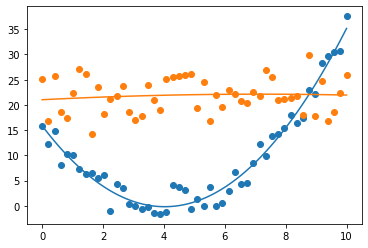

In [16]:
x_values = np.linspace(0, 10, 100)
y1_values = quadratic(x_values, *fit_1)
#y1_values = quadratic(x_values, a1, b1, c1) # fit1 = [a1, b1, c1]
y2_values = quadratic(x_values, *fit_2)

plt.figure()
plt.scatter(data['x'], data['y1'])
plt.scatter(data['x'], data['y2'])
plt.plot(x_values, y1_values)
plt.plot(x_values, y2_values)
plt.show()

## 5. FITS images (use the internet and creativity!)

### a. Read in the `Red.fits`, `Green.fits`, and `Blue.fits` files and print out their summaries

Hint: Remember that `.info()` function?

In [17]:
red = fits.open('Red.fits')
red.info()

Filename: Red.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   (3600, 3600)   int16 (rescales to uint16)   


In [18]:
green = fits.open('Green.fits')
green.info()

Filename: Green.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   (3600, 3600)   int16 (rescales to uint16)   


In [19]:
blue = fits.open('Blue.fits')
blue.info()

Filename: Blue.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   (3600, 3600)   int16 (rescales to uint16)   


### b. Use the header for `Red.fits` to find the R.A. and declination of the reference pixel, and save these to appropriately named variables

Hint: Print out the header of the main layer, and read the header descriptions to find the appropriate variables.

In [20]:
red_header = red[0].header
red_header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 3600 / length of data axis 1                          
NAXIS2  =                 3600 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
PROGRAM = 'PixInsight 01.08.03.1123' / Software that created this HDU           
COMMENT PixInsight Class Library: PCL 02.00.13.0692                             
COMMENT FITS module version 

In [21]:
print(red_header['CRVAL1'], red_header['CRVAL2'])

269.640136719 66.6320571899


### c. Plot the `Red.fits` image using an appropriate colorscale (e.g. black to red)

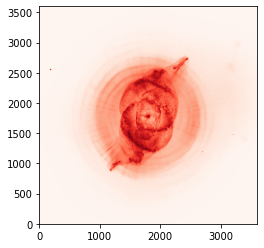

In [22]:
red_data = red[0].data

plt.figure()
plt.imshow(red_data, origin = 'lower', cmap = 'Reds')
plt.show()

### d. How many pixels in the red image have values greater than the average brightness?

In [23]:
av_brightness = np.mean(red_data)
np.sum(red_data > av_brightness)

3519520

### e. Plot the red image where pixels below the average brightness are black and pixels above the average brightness are white

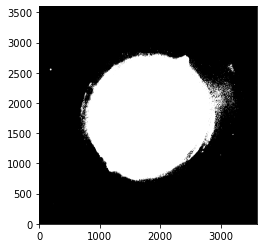

In [24]:
bright = red_data > av_brightness

plt.figure()
plt.imshow(bright, origin = 'lower', cmap = 'gray')
plt.show()

### f. Create a 2-by-2 plot which shows the red image, the green image, the blue image, and an image combining all three colors

<ipython-input-25-bbd1f7b34b27>:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


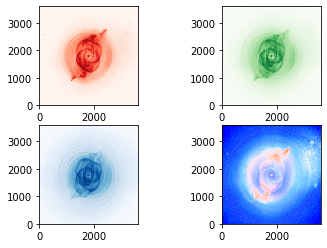

In [25]:
green_data = green[0].data
blue_data = blue[0].data
image = make_lupton_rgb(red_data.astype('float'), green_data.astype('float'), blue_data.astype('float'))

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(red_data, origin = 'lower', cmap = 'Reds')
axs[0, 1].imshow(green_data, origin = 'lower', cmap = 'Greens')
axs[1, 0].imshow(blue_data, origin = 'lower', cmap = 'Blues')
axs[1, 1].imshow(image, origin = 'lower')
fig.show()

### g. Create and save a new FITS image which contains the red, green, and blue images as separate layers

In [26]:
red_layer = fits.PrimaryHDU(data = red[0].data, header = red[0].header)
green_layer = fits.ImageHDU(data = green[0].data, header = green[0].header)
blue_layer = fits.ImageHDU(data = blue[0].data, header = blue[0].header)

hdu_list = fits.HDUList([red_layer, green_layer, blue_layer])
hdu_list.writeto('full_color.fits')

In [27]:
color = fits.open('full_color.fits')
color.info()

Filename: full_color.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   (3600, 3600)   int16 (rescales to uint16)   
  1                1 ImageHDU        32   (3600, 3600)   int16 (rescales to uint16)   
  2                1 ImageHDU        32   (3600, 3600)   int16 (rescales to uint16)   
